### ※ 문제56. 원형 그래프를 조금 더 고급스럽게 그리시오!

In [1]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=3d6b010b3176d5d7f8fbc4a22f52198abdc9067ce4ed2e73a1fd5d56e770040e
  Stored in directory: c:\users\knitwill\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
import pandas as pd
pf = pd.read_csv('PatientInfo.csv')

grouped = pf.groupby('sex')['patient_id'].count().reset_index()
grouped

,sex,patient_id
0,female,2218
1,male,1825


In [6]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
from plotly.subplots import make_subplots
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

trace = go.Pie(labels=grouped['sex'], values=grouped['patient_id'], pull=[0.05,0],marker=dict(colors=['brown','cornflowerblue']))
layout = go.Layout(title=" ",height=400,legend=dict(x=0.1,y=1.1))
fig = go.Figure(data = [trace],layout=layout)
iplot(fig)

### ※ 문제57. 나이대, 나이대별 코로나 환자수를 출력하시오

In [13]:
import pandas as pd
pf = pd.read_csv('PatientInfo.csv')
pf_g = pf.groupby('age')['patient_id'].count()
pf_df = pd.DataFrame({'age':pf_g.index,'count':pf_g.values})
pf_df

,age,count
0,0s,66
1,100s,1
2,10s,178
3,20s,899
4,30s,523
5,40s,518
6,50s,667
7,60s,482
8,70s,232
9,80s,170


### ※ 문제58. 위의 결과를 막대그래프로 그리시오

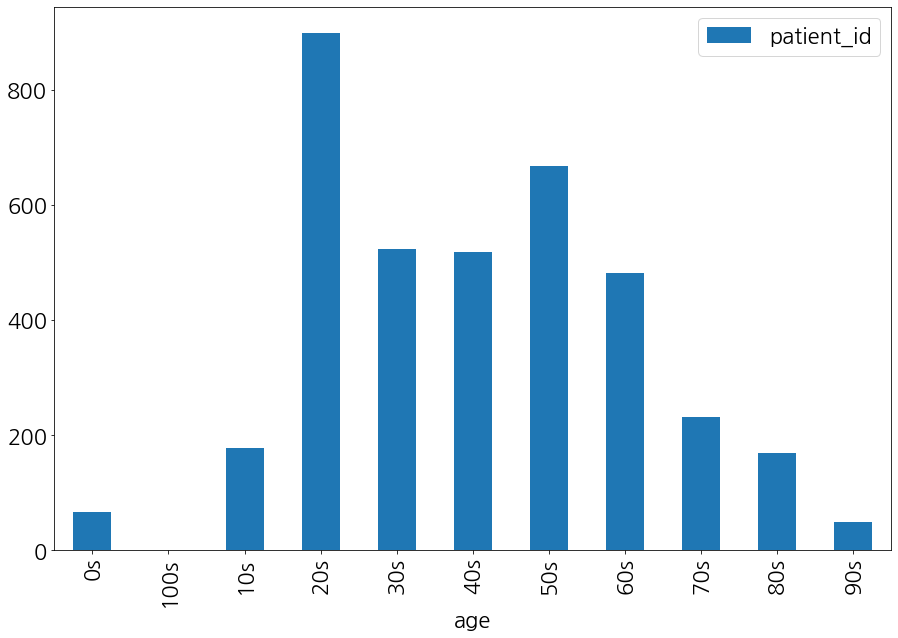

In [25]:
pf_g = pf.groupby('age')['patient_id'].count().reset_index()
pf_g.index = pf_g.age
pf_g.plot.bar()

### ※ 문제59. 위의 결과를 plotly 막대 그래프로도 그리시오

In [26]:
grouped = pf.groupby('age')['patient_id'].count().reset_index()
bar1 = go.Bar(x=grouped['age'],y=grouped['patient_id'],marker=dict(color='brown'))
layout = go.Layout(title="막대그래프", legend=dict(x=0.1,y=1.1,orientation="h"))
fig = go.Figure(bar1,layout=layout)
fig.show()

## <b>■ 날씨와 확진자 발생수는 상관관계가 있을까?</b>
    - 통계 : 상관관계
    - 데이터 : weather.csv, time.csv
    
## <b>■ Pandas를 이용한 join</b>
```python
    문법
        emp = pd.read_csv('emp3.csv')
        dept = pd.read_csv('deptno.csv')
        rs = pd.merge(emp, dept, on='deptno')
        rs[['ename','loc']]
```
                                           

In [28]:
emp = pd.read_csv('emp3.csv')
dept = pd.read_csv('dept.csv')
rs = pd.merge(emp, dept, on='deptno')
rs[['ename','loc']]

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,BLAKE,CHICAGO
4,MARTIN,CHICAGO
5,ALLEN,CHICAGO
6,TURNER,CHICAGO
7,JAMES,CHICAGO
8,WARD,CHICAGO
9,JONES,DALLAS


### ※ 문제60. time.csv와 weather.csv를 서로 조인해서 날짜와 평균기온과 확진자 누적수를 출력하시오

In [82]:
import pandas as pd
pd.set_option('display.max_rows',200)
time = pd.read_csv('time.csv')
wt = pd.read_csv('weather.csv')
rs = pd.merge(time, wt, on='date')
rs

,date,time,test,negative,confirmed,released,deceased,code,province,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,2020-01-20,16,1,0,1,0,0,10000,Seoul,0.7,-3.3,5.5,0.0,5.7,270.0,46.8
1,2020-01-20,16,1,0,1,0,0,11000,Busan,5.1,1.6,9.8,0.0,6.1,270.0,45.6
2,2020-01-20,16,1,0,1,0,0,12000,Daegu,4.6,2.4,8.1,0.0,6.4,290.0,44.1
3,2020-01-20,16,1,0,1,0,0,13000,Gwangju,4.0,1.2,7.9,0.0,3.3,270.0,63.1
4,2020-01-20,16,1,0,1,0,0,14000,Incheon,1.2,-2.1,5.1,0.0,8.6,320.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,2020-06-29,0,1259954,1228698,12757,11429,282,50000,Jeollabuk-do,22.0,19.7,26.5,27.6,4.4,90.0,85.1
2588,2020-06-29,0,1259954,1228698,12757,11429,282,51000,Jeollanam-do,21.9,20.0,24.0,80.5,16.8,90.0,97.9
2589,2020-06-29,0,1259954,1228698,12757,11429,282,60000,Gyeongsangbuk-do,20.4,17.4,24.5,43.9,4.5,160.0,90.9
2590,2020-06-29,0,1259954,1228698,12757,11429,282,61000,Gyeongsangnam-do,21.9,18.8,25.5,98.9,5.8,160.0,85.0


In [76]:
rs['pcount']=rs['confirmed']-rs['released']
rs2 = rs[['date','confirmed','avg_temp','pcount']]
rs3 = rs2.groupby('date')['pcount'].sum()
rs4 = rs2.groupby('date')['avg_temp'].mean()
rs3_df = pd.DataFrame(rs3)
rs4_df = pd.DataFrame(rs4)
rs_df = pd.merge(rs3_df, rs4_df, on='date')
rs_df

,pcount,avg_temp
date,,
2020-01-20,16,3.47500
2020-01-21,16,1.89375
2020-01-22,16,4.48125
2020-01-23,16,6.31250
2020-01-24,32,5.62500
...,...,...
2020-06-25,25424,21.74375
2020-06-26,22880,23.13125
2020-06-27,21376,24.14375


### ※ 문제61. 평균온도와 확진자수와의 상관계수를 출력하시오

In [77]:
rs_df.corr(method='pearson')

,pcount,avg_temp
pcount,1.000000,-0.131376
avg_temp,-0.131376,1.000000


In [85]:
result1 = pd.merge(wt,time, on = 'date')
b = result1[['date','avg_temp','confirmed','released','deceased']]
c = b.groupby('date')[['avg_temp','confirmed','released','deceased']].mean()
c['no_cu'] = (c.confirmed - c.confirmed.shift(1))+(c.released-c.released.shift(1))+(c.deceased-c.deceased.shift(1))

c[['avg_temp','no_cu']].corr(method='pearson')

,avg_temp,no_cu
avg_temp,1.000000,-0.212555
no_cu,-0.212555,1.000000


### ※ 문제62. 코로나 확진을 받고나서 회복될 까지 총 걸린 기간의 평균값을 출력하시오 (PatientInfo.csv)
    symptom_onset_date : 코로나 증상이 나타난 날짜
    confirmed_date : 코로나 확진 날짜
    released_date : 코로나 완치 날짜

In [113]:
import pandas as pd
pf = pd.read_csv('PatientInfo.csv')
pf[['released_date','confirmed_date']]=pf[['released_date','confirmed_date']].astype('datetime64[ns]')
pf[['confirmed_date','released_date']].fillna(0)
pf['release']=pf['released_date']-pf['confirmed_date']
print(pf['release'])
print(pf['release'].mean())

0      13 days
1      32 days
2      20 days
3      16 days
4      24 days
         ...  
5160   14 days
5161    8 days
5162       NaT
5163       NaT
5164       NaT
Name: release, Length: 5165, dtype: timedelta64[ns]
24 days 17:33:27.561436


In [117]:
#1. released_data 결측치 제거
pi=pd.read_csv("PatientInfo.csv")
pi2=pi[~pi['released_date'].isna()]
pi2

#2. released_date - confirmed_date 한 값을 period에 입력
pi2['period']=pd.to_datetime(pi['released_date'])-pd.to_datetime(pi['confirmed_date'])
print(pi2)

#3. period 평균화
print(pi2['period'].sum()/len(pi2))
#Timedelta('24 days 17:33:27.561436')

#또는
pi2['period'].mean()
#Timedelta('24 days 17:33:27.561436')

      patient_id     sex  age country province         city  \
0     1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1     1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2     1000000003    male  50s   Korea    Seoul    Jongno-gu   
3     1000000004    male  20s   Korea    Seoul      Mapo-gu   
4     1000000005  female  20s   Korea    Seoul  Seongbuk-gu   
...          ...     ...  ...     ...      ...          ...   
5157  7000000012  female  20s   Korea  Jeju-do      Jeju-do   
5158  7000000013  female  10s   China  Jeju-do      Jeju-do   
5159  7000000014  female  30s   Korea  Jeju-do      Jeju-do   
5160  7000000015  female  30s   Korea  Jeju-do      Jeju-do   
5161  7000000016     NaN  NaN   Korea  Jeju-do      Jeju-do   

            infection_case infected_by contact_number symptom_onset_date  \
0          overseas inflow         NaN             75         2020-01-22   
1          overseas inflow         NaN             31                NaN   
2     contact w

C:\Users\knitwill\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Timedelta('24 days 17:33:27.561436')

### ※ 문제63. PatientRoute.csv에서 patient_id별로 건수를 출력하시오

In [148]:
import pandas as pd
pr = pd.read_csv('PatientRoute.csv')
pr_c = pr.patient_id.value_counts()
pr_df = pd.DataFrame({'p_id':pr_c.index,'이동장소 수':pr_c.values})
pr_df

,p_id,이동장소 수
0,1000000417,45
1,3009000014,42
2,1000000846,41
3,1000000813,39
4,1400000021,38
...,...,...
1956,1000000899,1
1957,1300000041,1
1958,1000000883,1
1959,1000000867,1


### ※ 문제64. (오늘의 마지막 문제) 위의 결과 옆에 환자에 의해서 감염된 환자들의 숫자를 출력하시오 (PatientRoute.csv, PatientInfo.csv)

In [202]:
import pandas as pd
pf = pd.read_csv('PatientInfo.csv')
pr = pd.read_csv('PatientRoute.csv')

infc = pf.infected_by.value_counts()
locc = pr.patient_id.value_counts()

df1 = pd.DataFrame({'patient_id':infc.index,'감염자 수':infc.values})
df2 = pd.DataFrame({'patient_id':locc.index,'동선 수':locc.values})
df2['patient_id'] = df2['patient_id'].astype('str')

rs = pd.merge(df2, df1, on='patient_id',how='left').sort_values(by='동선 수', ascending=False)
rs

1000000417    45
3009000014    42
1000000846    41
1000000813    39
1400000021    38
              ..
1000000899     1
1300000041     1
1000000883     1
1000000867     1
1600000006     1
Name: patient_id, Length: 1961, dtype: int64